## Code of the FCNN to train with the augmented data set

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Input, Conv2DTranspose, ReLU, add
from tensorflow.keras.layers import BatchNormalization
import keras

Using TensorFlow backend.


In [2]:
#checking if there are 2 GPUs available 
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())#

In [3]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [4]:
#setting up 2 GPUs
strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [5]:
# Architecture of model
class Skip_S():
    def __init__(self):
        print("Initial Skipping Structure model...")
        self.model = self.initial_model()

    H = 424
    W = 424
    
    def initial_model(self):
        

        inputs = Input((None,None, 1))
        
        ##flat
        conv1_1 = Conv2D(32, (3, 3), strides = (1,1),  padding='same', name='conv1_1')(inputs)
        bn1_1 = BatchNormalization( name='bn1_1')(conv1_1)
        rel1_1 = ReLU(name='rel1_1')(bn1_1)
        
        conv1_2 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv1_2')(rel1_1)
        bn1_2 = BatchNormalization(name='bn1_2')(conv1_2)
        rel1_2 = ReLU(name='rel1_2')(bn1_2)
        
        conv1_3 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv1_3')(rel1_2)
        bn1_3 = BatchNormalization(name='bn1_3')(conv1_3)
        rel1_3 = ReLU(name='rel1_3')(bn1_3)
        
        conv1_4 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv1_4')(rel1_3)
        bn1_4 = BatchNormalization(name='bn1_4')(conv1_4)
        rel1_4 = ReLU(name='rel1_4')(bn1_4)
        
        
        ##DownSampling
        conv2_1 = Conv2D(64, (3, 3), strides = (2,2),  padding='same', name='conv2_1')(rel1_4)
        bn2_1 = BatchNormalization( name='bn2_1')(conv2_1)
        rel2_1 = ReLU(name='rel2_1')(bn2_1)
        
        conv2_2 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_2')(rel2_1)
        bn2_2 = BatchNormalization(name='bn2_2')(conv2_2)
        rel2_2 = ReLU(name='rel2_2')(bn2_2)
        
        conv2_3 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_3')(rel2_2)
        bn2_3 = BatchNormalization(name='bn2_3')(conv2_3)
        rel2_3 = ReLU(name='rel2_3')(bn2_3)
        
        conv2_4 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_4')(rel2_3)
        bn2_4 = BatchNormalization(name='bn2_4')(conv2_4)
        rel2_4 = ReLU(name='rel2_4')(bn2_4)
        
        conv2_5 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_5')(rel2_4)
        bn2_5 = BatchNormalization(name='bn2_5')(conv2_5)
        rel2_5 = ReLU(name='rel2_5')(bn2_5)
        
        conv2_6 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_6')(rel2_5)
        bn2_6 = BatchNormalization(name='bn2_6')(conv2_6)
        rel2_6 = ReLU(name='rel2_6')(bn2_6)
        
        
        ##DownSampling
        #print(rel2_6)
        conv3_1 = Conv2D(128, (3, 3), strides = (2,2),  padding='same', name='conv3_1')(rel2_6)
        #print(conv3_1)
        bn3_1 = BatchNormalization( name='bn3_1')(conv3_1)
        rel3_1 = ReLU(name='rel3_1')(bn3_1)
        
        conv3_2 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_2')(rel3_1)
        bn3_2 = BatchNormalization(name='bn3_2')(conv3_2)
        rel3_2 = ReLU(name='rel3_2')(bn3_2)
        
        conv3_3 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_3')(rel3_2)
        bn3_3 = BatchNormalization(name='bn3_3')(conv3_3)
        rel3_3 = ReLU(name='rel3_3')(bn3_3)
        
        conv3_4 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_4')(rel3_3)
        bn3_4 = BatchNormalization(name='bn3_4')(conv3_4)
        rel3_4 = ReLU(name='rel3_4')(bn3_4)
        
        conv3_5 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_5')(rel3_4)
        bn3_5 = BatchNormalization(name='bn3_5')(conv3_5)
        rel3_5 = ReLU(name='rel3_5')(bn3_5)
        
        conv3_6 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_6')(rel3_5)
        bn3_6 = BatchNormalization(name='bn3_6')(conv3_6)
        rel3_6 = ReLU(name='rel3_6')(bn3_6)
        
        conv3_7 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_7')(rel3_6)
        bn3_7 = BatchNormalization(name='bn3_7')(conv3_7)
        rel3_7 = ReLU(name='rel3_7')(bn3_7)
        
        conv3_8 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_8')(rel3_7)
        bn3_8 = BatchNormalization(name='bn3_8')(conv3_8)
        rel3_8 = ReLU(name='rel3_8')(bn3_8)
        
        conv3_9 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_9')(rel3_8)
        bn3_9 = BatchNormalization(name='bn3_9')(conv3_9)
        rel3_9 = ReLU(name='rel3_9')(bn3_9)


        
        
        ##DownSampling
        conv4_1 = Conv2D(256, (3, 3), strides = (2,2),  padding='same', name='conv4_1')(rel3_9)
        bn4_1 = BatchNormalization( name='bn4_1')(conv4_1)
        rel4_1 = ReLU(name='rel4_1')(bn4_1)
        
        conv4_2 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_2')(rel4_1)
        bn4_2 = BatchNormalization(name='bn4_2')(conv4_2)
        rel4_2 = ReLU(name='rel4_2')(bn4_2)
        
        conv4_3 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_3')(rel4_2)
        bn4_3 = BatchNormalization(name='bn4_3')(conv4_3)
        rel4_3 = ReLU(name='rel4_3')(bn4_3)
        
        conv4_4 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_4')(rel4_3)
        bn4_4 = BatchNormalization(name='bn4_4')(conv4_4)
        rel4_4 = ReLU(name='rel4_4')(bn4_4)
        
        conv4_5 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_5')(rel4_4)
        bn4_5 = BatchNormalization(name='bn4_5')(conv4_5)
        rel4_5 = ReLU(name='rel4_5')(bn4_5)
        
        conv4_6 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_6')(rel4_5)
        bn4_6 = BatchNormalization(name='bn4_6')(conv4_6)
        rel4_6 = ReLU(name='rel4_6')(bn4_6)
                
        conv4_7 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_7')(rel4_6)
        bn4_7 = BatchNormalization(name='bn4_7')(conv4_7)
        rel4_7 = ReLU(name='rel4_7')(bn4_7)
        
        conv4_8 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_8')(rel4_7)
        bn4_8 = BatchNormalization(name='bn4_8')(conv4_8)
        rel4_8 = ReLU(name='rel4_8')(bn4_8)
        
        conv4_9 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_9')(rel4_8)
        bn4_9 = BatchNormalization(name='bn4_9')(conv4_9)
        rel4_9 = ReLU(name='rel4_9')(bn4_9)
         

        
        
        ##UpSampling
        upconv5_1 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', name='upconv5_1')(rel4_9)
        bn5_1 = BatchNormalization( name='bn5_1')(upconv5_1)
        rel5_1 = ReLU(name='rel5_1')(bn5_1)
        
        conv5_2 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_2')(rel5_1)
        bn5_2 = BatchNormalization(name='bn5_2')(conv5_2)
        rel5_2 = ReLU(name='rel5_2')(bn5_2)
        
        conv5_3 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_3')(rel5_2)
        bn5_3 = BatchNormalization(name='bn5_3')(conv5_3)
        rel5_3 = ReLU(name='rel5_3')(bn5_3)
        
        conv5_4 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_4')(rel5_3)
        bn5_4 = BatchNormalization( name='bn5_4')(conv5_4)
        rel5_4 = ReLU(name='rel5_4')(bn5_4)
        
        conv5_5 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_5')(rel5_4)
        bn5_5 = BatchNormalization(name='bn5_5')(conv5_5)
        rel5_5 = ReLU(name='rel5_5')(bn5_5)
        
        conv5_6 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_6')(rel5_5)
        bn5_6 = BatchNormalization(name='bn5_6')(conv5_6)
        rel5_6 = ReLU(name='rel5_6')(bn5_6)
        
        conv5_7 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_7')(rel5_6)
        bn5_7 = BatchNormalization( name='bn5_7')(conv5_7)
        rel5_7 = ReLU(name='rel5_7')(bn5_7)
        
        conv5_8 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_8')(rel5_7)
        bn5_8 = BatchNormalization(name='bn5_8')(conv5_8)
        rel5_8 = ReLU(name='rel5_8')(bn5_8)       
        
        conv5_9 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_9')(rel5_8)   
        up1 = add([ conv5_9, conv3_9])
        bn5_9 = BatchNormalization(name='bn5_9')(up1)       
        rel5_9 = ReLU(name='rel5_9')(bn5_9)
        
         
        
        
        
        ##UpSampling
        upconv6_1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', name='upconv6_1')(rel5_9)
        bn6_1 = BatchNormalization( name='bn6_1')(upconv6_1)
        rel6_1 = ReLU(name='rel6_1')(bn6_1)
        
        conv6_2 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_2')(rel6_1)
        bn6_2 = BatchNormalization(name='bn6_2')(conv6_2)
        rel6_2 = ReLU(name='rel6_2')(bn6_2)
        
        conv6_3 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_3')(rel6_2)
        bn6_3 = BatchNormalization(name='bn6_3')(conv6_3)
        rel6_3 = ReLU(name='rel6_3')(bn6_3)
        
        conv6_4 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_4')(rel6_3)
        bn6_4 = BatchNormalization( name='bn6_4')(conv6_4)
        rel6_4 = ReLU(name='rel6_4')(bn6_4)
        
        conv6_5 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_5')(rel6_4)
        bn6_5 = BatchNormalization(name='bn6_5')(conv6_5)
        rel6_5 = ReLU(name='rel6_5')(bn6_5)
        
        conv6_6 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_6')(rel6_5)
        up2 =  add([ conv6_6, conv2_6])
        bn6_6 = BatchNormalization(name='bn6_6')(up2)       
        rel6_6 = ReLU(name='rel6_6')(bn6_6)
        
        
        ##UpSampling
        upconv7_1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', name='upconv7_1')(rel6_6)
        bn7_1 = BatchNormalization( name='bn7_1')(upconv7_1)
        rel7_1 = ReLU(name='rel7_1')(bn7_1)
        
        conv7_2 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv7_2')(rel7_1)
        bn7_2 = BatchNormalization(name='bn7_2')(conv7_2)
        rel7_2 = ReLU(name='rel7_2')(bn7_2)
        
        conv7_3 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv7_3')(rel7_2)
        bn7_3 = BatchNormalization(name='bn7_3')(conv7_3)
        rel7_3 = ReLU(name='rel7_3')(bn7_3)
        
        conv7_4 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv7_4')(rel7_3)
        up3 = add( [conv7_4, conv1_4])
        bn7_4 = BatchNormalization( name='bn7_4')(up3)
        rel7_4 = ReLU(name='rel7_4')(bn7_4)
        
        ## flat
        conv8_1 = Conv2D(16, (3,3), strides = (1,1) , padding='same', name='conv8_1')(rel7_4)
        bn8_1 = BatchNormalization(name='bn8_1')(conv8_1)
        rel8_1 = ReLU(name='rel8_1')(bn8_1)
        
        conv8_2 = Conv2D(16, (3, 3), strides = (1,1) , padding='same', name='conv8_2')(rel8_1)
        bn8_2 = BatchNormalization(name='bn8_2')(conv8_2)
        rel8_2 = ReLU(name='rel8_2')(bn8_2)
        
        conv8_3 = Conv2D(1, (3, 3), strides = (1,1) , padding='same', name='conv8_3')(rel8_2)
        bn8_3 = BatchNormalization(name='bn8_3')(conv8_3)
        sig8_3 = tf.keras.layers.Activation(activation='sigmoid', name = 'sig8_3')(bn8_3)
        
                          
                
    
        
        
        model = Model(inputs=[inputs], outputs=[sig8_3])
        return model

    def model_summary(self):
        self.model.summary()

    def get_model(self):
        return self.model

In [6]:
import tensorflow.keras.backend as K

In [8]:
#custom loss function  
def custom_loss():
    def loss(target, pred):
        a = 0.5
        B = 0.5
        g = 0.5

        ##invert image
        pred_inv = 1 - pred[:,:,:,0]
        target_inv = 1 - target[:,:,:,0]

        ## not inverted
        pred = pred[:,:,:,0]
        target = target[:,:,:,0]

        def intersection (target_b, pred_b , a):
            inter = pred_b * target_b

            PG = K.sum(target_b)
            PD = K.sum((pred_b))
            PGuPD = K.sum(inter)
            DP = PGuPD/(PG + K.epsilon())
            FP = PGuPD/(PD + K.epsilon())
            return (a*DP +(1-a)*FP)


        PMI = intersection(target_inv, pred_inv, a)   
        GMI = intersection(target, pred, B)

        return (1 - (g*(PMI) + (1-g)*GMI))

    return loss

In [9]:
#intiallizing model
with strategy.scope():
    skip_s = Skip_S()
    model = skip_s.initial_model()
   #opti = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9)

    model.compile(optimizer = 'adam', loss = custom_loss() )


Initial Skipping Structure model...
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/d

In [10]:
##getting data

import os

def get_data(Input, Target):
    i=0
    Targets =sorted(os.listdir(Target))
    Inputs = sorted(os.listdir(Input))
    input_images = np.zeros((3660,424,424,1))
    target_images = np.zeros((3660,424,424,1))
    print(input_images.shape)
    input_paths, target_paths = [], []
    for input_image, target_image in zip(Inputs, Targets):
        
        image_path = os.path.join(Input, input_image)
        target_path = os.path.join(Target, target_image)
        
        #print(image_path)
        #input_paths.append(image_path)
        #target_paths.append(target_path)
        
        img_input = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img_target = cv2.imread(target_path, cv2.IMREAD_GRAYSCALE)
        
        ##normalise images
        #img_input = img_input/(img_input.max())
        img_target = img_target/(img_target.max())
        
        mean = np.mean(img_target)

        img_temp = np.zeros((img_target.shape))
        img_temp[img_target >=  mean] = 1
        img_target = img_temp
        
        #img_target[img_target > 0.9] = 1
        #img_target[img_target <= 0.9] = 0
        
        #print(i)
        input_images[i,:,:,0] =cv2.resize(src=img_input, dsize=(424,424), interpolation=cv2.INTER_AREA)
        target_images[i,:,:,0] = cv2.resize(src=img_target, dsize=(424,424), interpolation=cv2.INTER_AREA)
        i = i +1

    return input_images, target_images

Input = 'C:/Users/User/Desktop/NicoleBonnici/Keras Models/Keras Models/Dataset_comb_again/Input_Reduced'
Target = 'C:/Users/User/Desktop/NicoleBonnici/Keras Models/Keras Models/Dataset_comb_again/Target_Reduced'

input_img,target_img = get_data(Input, Target)

#for input_image, target_image in zip(Inputs, Targets):
    #img_input = cv2.imread(input_paths)
    #img_target = cv2.imread(target_paths)
    
    #input_images.append(img_input)
    #input_targets.append(img_target)






(3660, 424, 424, 1)


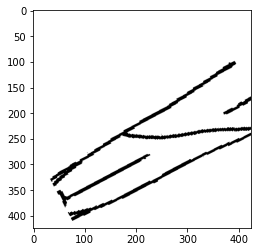

In [11]:
#checking data is in the correct order through testing some samples
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(target_img[3400],cmap = 'gray')

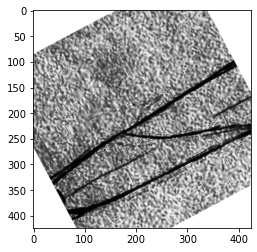

In [12]:
plt.imshow(input_img[3400],cmap = 'gray')


In [13]:
#to measure time
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()
        
callbacks =  [time_callback]         

In [14]:
#check point callback
mc = keras.callbacks.ModelCheckpoint('FCCN_reduced_dataset_adam{epoch:08d}.h5', 
                                     monitor = 'loss',
                                     save_weights_only=False, period=50)
callbacks =  [time_callback ,mc] 


In [19]:
#training model
history = model.fit(input_img[:,:,:,:], target_img[:,:,:,:],
                            batch_size=16,##8 in the model
                            callbacks = callbacks,
                          epochs=100)

Train on 3660 samples
Epoch 1/100
INFO:tensorflow:batch_all_reduce: 200 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
3660/3660 [==============================] - 160s 44ms/sample - loss: 0.3896 - accuracy: 0.7437 - precision_m: 0.9925 - recall_m: 0.7360 - f1_m: 0.8437
Epoch 2/100
3660/3660 [==============================] - 150s 41ms/sample - loss: 0.3584 - accuracy: 0.8016 - precision_m: 0.9937 - recall_m: 0.7965 - f1_m: 0.8840
Epoch 3/100
3660/3660 [==============================] - 156s 43ms/sample - loss: 0.3369 - accuracy: 0.8243 - precision_m: 0.9940 - recall_m: 0.8202 - f1_m: 0.8986
Epoch 4/100
3660/3660 [==============================] - 159s 43ms/sample - loss: 0.3213 - accuracy: 0.8354 - precision_m: 0.9938 - recall_m: 0.8321 - f1_m: 0.9057
Epoch 5/100
3660/3660 [==============================] - 158s 43ms/sample - loss: 0.3095 - accuracy: 0.8436 - precision_m: 0.9935 - recall_m: 0.8410 - f1_m:

3660/3660 [==============================] - 169s 46ms/sample - loss: 0.2332 - accuracy: 0.8949 - precision_m: 0.9928 - recall_m: 0.8957 - f1_m: 0.9416
Epoch 99/100
3660/3660 [==============================] - 168s 46ms/sample - loss: 0.2328 - accuracy: 0.8963 - precision_m: 0.9927 - recall_m: 0.8973 - f1_m: 0.9424
Epoch 100/100
3660/3660 [==============================] - 167s 46ms/sample - loss: 0.2323 - accuracy: 0.8965 - precision_m: 0.9927 - recall_m: 0.8975 - f1_m: 0.9426


In [22]:
#saving model
model.save("Model.h5")

In [23]:
#saving history
np.save('History.npy',history.history) 

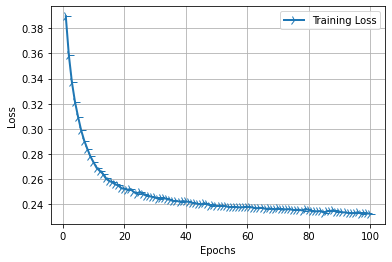

In [31]:
#plotting history
history_dict = history.history

train_loss = history_dict['loss']#Training loss
#val_loss = history_dict['val_loss']#Validation loss
epochs = range(1,len(train_loss)+1)#Number of epochs

line1 = plt.plot(epochs, train_loss, label = 'Training Loss')
#line2 = plt.plot(epochs, val_loss, label = 'Validation Loss')

plt.setp(line1,linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line1,linewidth = 2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.grid(True)
plt.legend()
 
plt.show()